In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from setup import *
plt.rcParams.update({'font.size': 9})
%matplotlib inline

In [118]:
colors = {"laplace":"cornflowerblue", "tnorm":"mediumseagreen", "norm":"salmon", "poisson":"plum", 
          "norm_ens": "peru", "norm_homo":"gray"}
colors2 = {"laplace":"navy", "tnorm":"darkgreen", "norm":"red", "poisson":"purple", 
          "norm_ens": "saddlebrown", "norm_homo":"darkslategray"}
label = {"laplace":"LAP", "tnorm":"TG", "norm":"HetG", "poisson":"Pois", 
          "norm_ens": "GEns", "norm_homo":"HomoG"}

In [113]:
out_folder = "220405"
result_file = "results.csv"
model_type = "GCN"

In [114]:
dfb = pd.read_csv(project_dir+"results/"+out_folder+"_before/"+result_file)
dfb.sort_values(by='val_nll_loss', inplace=True)

plb = dfb.groupby(['Distribution','Model Type']).head(20)

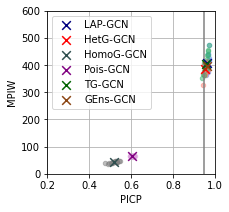

In [119]:
fig, ax = plt.subplots(1,1, figsize=(3,3))
for d,p,m in zip(plb['Distribution'],plb['test_picp'], plb['test_mpiw']):
    ax.scatter(p,m, alpha=0.5, c = colors[d], s=20, zorder=0)
for (d,t),g in dfb.groupby(['Distribution','Model Type']):
    ax.scatter(g['test_picp'].head(20).mean(), g['test_mpiw'].head(20).mean(), c=colors2[d], marker='x', 
               s=75, zorder=100, label=label[d]+"-"+model_type)
ax.scatter(0.962, 396.96, c=colors2['norm_ens'], marker='x', 
               s=75, zorder=100, label=label['norm_ens']+"-"+model_type)
ax.set_xlim([0.2, 1])
ax.set_ylim([0, 600])
ax.plot([0.95, 0.95], [0,600], c='gray')
ax.legend()
ax.grid()
ax.set_xlabel("PICP")
ax.set_ylabel("MPIW");
fig.savefig(project_dir+"figures/"+out_folder+"/before_picp_mpiw_tradeoff.png", bbox_inches='tight')


In [116]:
dfa = pd.read_csv(project_dir+"results/"+out_folder+"_after/"+result_file)
dfa.sort_values(by='val_nll_loss', inplace=True)

pla = dfa.groupby(['Distribution','Model Type']).head(20)

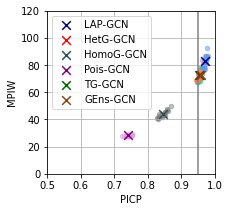

In [120]:
fig, ax = plt.subplots(1,1, figsize=(3,3))
for d,p,m in zip(pla['Distribution'],pla['test_picp'], pla['test_mpiw']):
    ax.scatter(p,m, alpha=0.5, c = colors[d], s=20, zorder=0)
for (d,t),g in dfa.groupby(['Distribution','Model Type']):
    ax.scatter(g['test_picp'].head(20).mean(), g['test_mpiw'].head(20).mean(), c=colors2[d], marker='x', 
               s=75, zorder=100, label=label[d]+"-"+model_type)
ax.scatter(0.958, 73.04, c=colors2['norm_ens'], marker='x', 
               s=75, zorder=100, label=label['norm_ens']+"-"+model_type)

ax.set_xlim([0.5, 1])
ax.set_ylim([0, 120])
ax.plot([0.95, 0.95], [0,120], c='gray')
ax.legend()
ax.grid()
ax.set_xlabel("PICP")
ax.set_ylabel("MPIW");
fig.savefig(project_dir+"figures/"+out_folder+"/after_picp_mpiw_tradeoff.png", bbox_inches='tight')
